# Problem Statements:
Task: Build an Artificial Neural Network to identify the customers who will be leaving the bank, based on the data of all customers over the past three months.
##Task A:
- Load the dataset
- Drop the unnecessary data columns that will not be useful for analysis. (Hint: First three columns)
- Perform EDA on Geography, NumOfProducts, and Age
- Prepare independent variables X and dependent variable Y (Exited).
- LabelEncode the Gender column
- OneHotEncode the Geography column
- Perform a train test split in the ratio 80:20 and random_state 0
- Build a Keras Sequential model with the following layers
- Dense layer with 6 neurons and activation relu
- Dense layer with 6 neurons and activation relu
- Dense layer with 1 neuron and activation sigmoid
- Compile the model with Adam optimizer, binary_crossentropy loss and metric accuracy
- Train the model for 10 epochs and batch size 10
- Evaluate the model on the train vs validation datasets based on accuracy score
- plot the confusion matrix

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense 

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df1 = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: xlabel='NumOfProducts', ylabel='Count'>

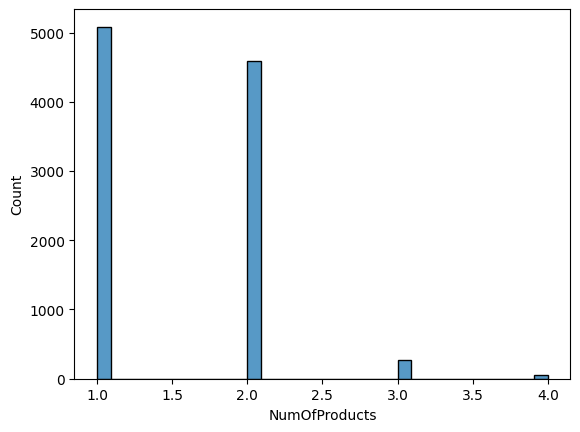

In [7]:
sns.histplot(df['NumOfProducts'])

<Axes: xlabel='Age', ylabel='Count'>

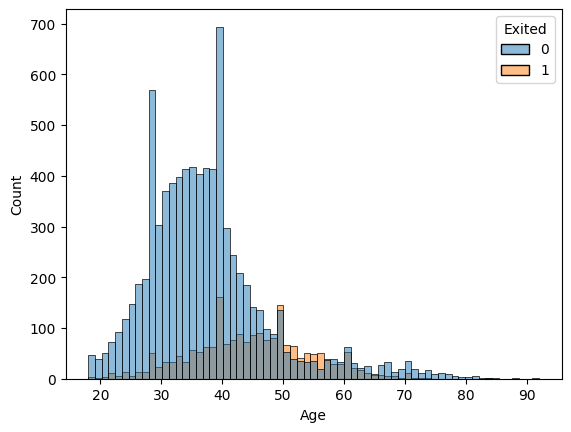

In [8]:
sns.histplot(data=df, x='Age', hue='Exited')

### Observations

- The majority of customers have 1 or 2 products; only a few have 3 or 4
- The people who exited have lower kurtosis value vs. the people who stayed
- There are 3 geographies: 'France', 'Spain', 'Germany'

In [9]:
df_get_dummies = pd.get_dummies(df1,columns= ['Geography', 'Gender'],dtype=int)
df_get_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [10]:
X = df_get_dummies.drop('Exited', axis=1)
y = df_get_dummies['Exited'] #target variable

In [11]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [13]:
X.shape

(10000, 13)

In [14]:
ss = StandardScaler()
df_ss = ss.fit_transform(X)


In [15]:
df_ss

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_ss, y, test_size=.2)

In [17]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(6, activation='relu'), 
       # tf.keras.layers.Dropout(0.2), #for regularization to address overfitting
        tf.keras.layers.Dense(1, activation='sigmoid')    
    ]
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
13 * 6 + 6

84

In [45]:
6 * 6 + 6

42

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model_history = model.fit(X_train, y_train, validation_split=.2, batch_size=10, epochs=10)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.7901 - loss: 0.5313 - val_accuracy: 0.7987 - val_loss: 0.4608
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.7998 - loss: 0.4505 - val_accuracy: 0.7919 - val_loss: 0.4448
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.7876 - loss: 0.4461 - val_accuracy: 0.7944 - val_loss: 0.4368
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8004 - loss: 0.4297 - val_accuracy: 0.7944 - val_loss: 0.4304
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8111 - loss: 0.4149 - val_accuracy: 0.8119 - val_loss: 0.4266
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8179 - loss: 0.4180 - val_accuracy: 0.8144 - val_loss: 0.4173
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8308 - loss: 0.3946 - val_accuracy: 0.8181 - val_loss: 0.4096
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8227 - loss: 0.3991 - 

In [19]:
prediction = model(X_train)
prediction

<tf.Tensor: shape=(8000, 1), dtype=float32, numpy=
array([[0.47495392],
       [0.4691293 ],
       [0.5090323 ],
       ...,
       [0.5289166 ],
       [0.32945558],
       [0.45233563]], dtype=float32)>

In [24]:
model_history.history

{'accuracy': [0.796093761920929,
  0.7965624928474426,
  0.7975000143051147,
  0.8029687404632568,
  0.8162500262260437,
  0.823437511920929,
  0.827343761920929,
  0.8318750262260437,
  0.8392187356948853,
  0.8453124761581421],
 'loss': [0.4972616136074066,
  0.44723421335220337,
  0.43280118703842163,
  0.4251618981361389,
  0.4168756902217865,
  0.40937405824661255,
  0.40189728140830994,
  0.39458462595939636,
  0.3873358368873596,
  0.3799288272857666],
 'val_accuracy': [0.7987499833106995,
  0.7918750047683716,
  0.7943750023841858,
  0.7943750023841858,
  0.8118749856948853,
  0.8143749833106995,
  0.8181250095367432,
  0.8231250047683716,
  0.8393750190734863,
  0.8431249856948853],
 'val_loss': [0.4608089327812195,
  0.44479209184646606,
  0.43684467673301697,
  0.43038859963417053,
  0.426596462726593,
  0.41731542348861694,
  0.40960565209388733,
  0.4027237296104431,
  0.3955976963043213,
  0.38996779918670654]}

In [25]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'Loss')

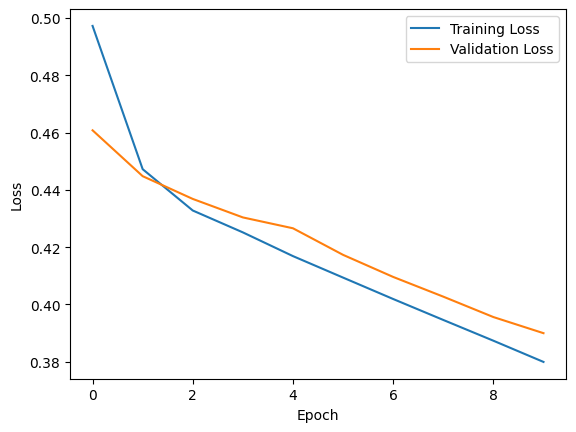

In [26]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Observations

- The training data loss decreases steeply in the early Epochs; later the slope is less steep
- The least amount of overfitting is occuring around Epoch 1

Text(0, 0.5, 'accuracy')

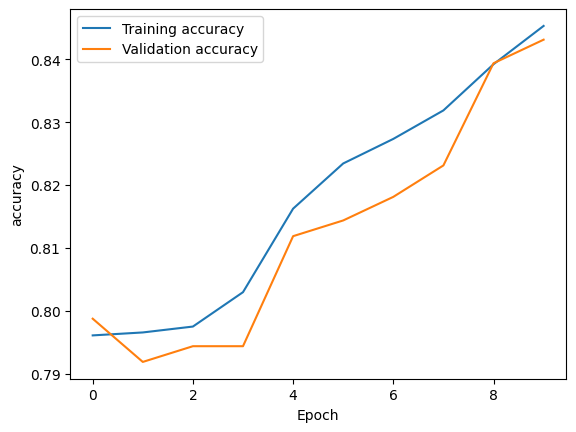

In [28]:
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('accuracy')

### Observations

- Making progress in accuracy after each Epoch but unevenly
- Because the training & validation accuracy plots are close together, we have neither overfitting or underfitting
- The model appears to be learning well